In [ ]:
subject_num = 'all'
subjects=[0, 1, 2, 3, 4, 5, 6, 7, 8]

# Module loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/C247/Final project/')
%cd '/content/drive/MyDrive/Colab Notebooks/C247/Final project/'

/content/drive/MyDrive/Colab Notebooks/C247/Final project


In [ ]:
pwd = !pwd
data_path = str(pwd[0]) + '/data/'
print(data_path)

/content/drive/MyDrive/Colab Notebooks/C247/Final project/data/


In [ ]:
from models import *
from utils import *
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras.utils import to_categorical
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout, ReLU
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Reshape
from keras.layers import LSTM, Embedding, LeakyReLU, Conv2DTranspose
from keras.layers import InputLayer, GRU, Input
from keras.layers import Lambda, LeakyReLU
from keras.utils import to_categorical, plot_model
from keras import backend as K
from keras.losses import mse, binary_crossentropy
from keras import metrics
# from keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers.legacy import Adam
import os

# Data Loading and Preprocessing

In [ ]:
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=subjects)
# check data shape
print('X_train_valid:', X_train_valid.shape)
print('y_train_valid:', y_train_valid.shape)
print('X_test:', X_test.shape)
print('y_test:', y_test.shape)

X_train_valid: (2115, 22, 1000)
y_train_valid: (2115,)
X_test: (443, 22, 1000)
y_test: (443,)


## Question 1

Prepare the test data in subject 1.

In [ ]:
person_test = np.load(data_path + "person_test.npy")
X_test_s1 = X_test[np.where(person_test == 0)[0], :, :]
y_test_s1 = y_test[np.where(person_test == 0)[0]]
print('X_test_s1:', X_test_s1.shape)
print('y_test_s1:', y_test_s1.shape)

X_test_s1: (50, 22, 1000)
y_test_s1: (50,)


In [ ]:
## Random splitting and reshaping the data
# First generating the training and validation indices using random splitting

ind_valid = np.random.choice(2115, 375, replace=False)
ind_train = np.array(list(set(range(2115)).difference(set(ind_valid))))

# Creating the training and validation sets using the generated indices
(X_train, X_valid) = X_train_valid[ind_train], X_train_valid[ind_valid] 
(y_train, y_valid) = y_train_valid[ind_train], y_train_valid[ind_valid]


## Preprocessing the dataset
x_train, y_train = data_prep(X_train,y_train,2,2,True)
x_valid, y_valid = data_prep(X_valid,y_valid,2,2,True)
X_test_prep, y_test_prep = data_prep(X_test,y_test,2,2,True)


print('Shape of testing set:',X_test_prep.shape)
print('Shape of testing labels:',y_test_prep.shape)

print('Shape of training set:',x_train.shape)
print('Shape of validation set:',x_valid.shape)
print('Shape of training labels:',y_train.shape)
print('Shape of validation labels:',y_valid.shape)



# Converting the labels to categorical variables for multiclass classification
y_train = to_categorical(y_train, 4)
y_valid = to_categorical(y_valid, 4)
y_test = to_categorical(y_test_prep, 4)
print('Shape of training labels after categorical conversion:',y_train.shape)
print('Shape of validation labels after categorical conversion:',y_valid.shape)
print('Shape of test labels after categorical conversion:',y_test.shape)

# Adding width of the segment to be 1
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_valid = x_valid.reshape(x_valid.shape[0], x_valid.shape[1], x_valid.shape[2], 1)
x_test = X_test_prep.reshape(X_test_prep.shape[0], X_test_prep.shape[1], X_test_prep.shape[2], 1)
print('Shape of training set after adding width info:',x_train.shape)
print('Shape of validation set after adding width info:',x_valid.shape)
print('Shape of test set after adding width info:',x_test.shape)


# Reshaping the training and validation dataset
x_train = np.swapaxes(x_train, 1,3)
x_train = np.swapaxes(x_train, 1,2)
x_valid = np.swapaxes(x_valid, 1,3)
x_valid = np.swapaxes(x_valid, 1,2)
x_test = np.swapaxes(x_test, 1,3)
x_test = np.swapaxes(x_test, 1,2)
print('Shape of training set after dimension reshaping:',x_train.shape)
print('Shape of validation set after dimension reshaping:',x_valid.shape)
print('Shape of test set after dimension reshaping:',x_test.shape)

Shape of testing set: (1772, 22, 250)
Shape of testing labels: (1772,)
Shape of training set: (6960, 22, 250)
Shape of validation set: (1500, 22, 250)
Shape of training labels: (6960,)
Shape of validation labels: (1500,)
Shape of training labels after categorical conversion: (6960, 4)
Shape of validation labels after categorical conversion: (1500, 4)
Shape of test labels after categorical conversion: (1772, 4)
Shape of training set after adding width info: (6960, 22, 250, 1)
Shape of validation set after adding width info: (1500, 22, 250, 1)
Shape of test set after adding width info: (1772, 22, 250, 1)
Shape of training set after dimension reshaping: (6960, 250, 1, 22)
Shape of validation set after dimension reshaping: (1500, 250, 1, 22)
Shape of test set after dimension reshaping: (1772, 250, 1, 22)


In [ ]:
X_test_prep_s1, y_test_prep_s1 = data_prep(X_test_s1, y_test_s1, 2,2,True)
y_test_s1 = to_categorical(y_test_prep_s1, 4)
x_test_s1 = X_test_prep_s1.reshape(X_test_prep_s1.shape[0], X_test_prep_s1.shape[1], X_test_prep_s1.shape[2], 1)
x_test_s1 = np.swapaxes(x_test_s1, 1,3)
x_test_s1 = np.swapaxes(x_test_s1, 1,2)

In [ ]:
print('x_test_s1:', x_test_s1.shape)
print('y_test_s1:', y_test_s1.shape)

x_test_s1: (200, 250, 1, 22)
y_test_s1: (200, 4)


# Model Training

In [ ]:
learning_rate = 1e-3
epochs = 100
batch_size = 64
# optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
optimizer = keras.optimizers.legacy.Adam(learning_rate=learning_rate)

In [ ]:
def print_model_results(model, model_name, model_results, subject=subject_num):
  # Plotting accuracy trajectory
  plt.plot(model_results.history['accuracy'])
  plt.plot(model_results.history['val_accuracy'])
  plt.title(str(model_name) + ' model accuracy trajectory')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='best')
  plt.savefig(fname=str(model_name) + '_acc_' + str(subject), format='png')
  plt.show()

  # Plotting loss trajectory
  plt.plot(model_results.history['loss'],'-')
  plt.plot(model_results.history['val_loss'],'-')
  plt.title(str(model_name) + ' model loss trajectory')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='best')
  plt.savefig(fname=str(model_name) + '_loss_' + str(subject), format='png')
  plt.show()

  # Testing the model
  model_score = model.evaluate(x_test, y_test, verbose=0)
  print('Test accuracy of the ' + str(model_name) + ' model:', model_score[1])
  

## Convolutional Neural Networks (CNN)

In [ ]:
model_cnn = CNN()
model_cnn.compile(loss='categorical_crossentropy',
                 optimizer=optimizer,
                 metrics=['accuracy'])

In [ ]:
# Training and validating the model
CNN_results = model_cnn.fit(x_train,
                        y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_valid, y_valid), verbose=True)

Epoch 1/100
109/109 [==============================] - 11s 13ms/step - loss: 2.1639 - accuracy: 0.2941 - val_loss: 1.3665 - val_accuracy: 0.3760
Epoch 2/100
109/109 [==============================] - 1s 10ms/step - loss: 1.6699 - accuracy: 0.3402 - val_loss: 1.3556 - val_accuracy: 0.3713
Epoch 3/100
109/109 [==============================] - 1s 9ms/step - loss: 1.4543 - accuracy: 0.3705 - val_loss: 1.3028 - val_accuracy: 0.3613
Epoch 4/100
109/109 [==============================] - 1s 9ms/step - loss: 1.3186 - accuracy: 0.4277 - val_loss: 1.2211 - val_accuracy: 0.4587
Epoch 5/100
109/109 [==============================] - 1s 7ms/step - loss: 1.2400 - accuracy: 0.4634 - val_loss: 1.2010 - val_accuracy: 0.4627
Epoch 6/100
109/109 [==============================] - 1s 7ms/step - loss: 1.1963 - accuracy: 0.4760 - val_loss: 1.1572 - val_accuracy: 0.5093
Epoch 7/100
109/109 [==============================] - 1s 7ms/step - loss: 1.1477 - accuracy: 0.5098 - val_loss: 1.2094 - val_accuracy: 0.4

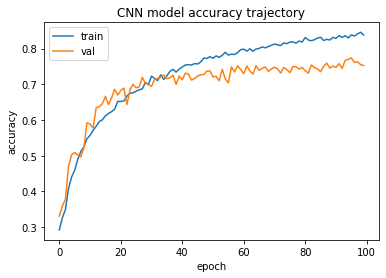

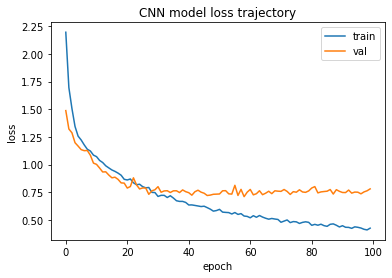

Test accuracy of the CNN model: 0.7330699563026428


In [ ]:
print_model_results(model_cnn, 'CNN', CNN_results)

In [ ]:
print(model_cnn.summary())
print(model_cnn.cnn_layers.summary(), model_cnn.fc.summary())

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 CNN_layers (Sequential)     (None, 4, 1, 200)         269875    
                                                                 
 FC_layers (Sequential)      (None, 4)                 3204      
                                                                 
Total params: 273,079
Trainable params: 272,329
Non-trainable params: 750
_________________________________________________________________
None
Model: "CNN_layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 1, 25)        5525      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 1, 25)        0         
 )                                                               
                              

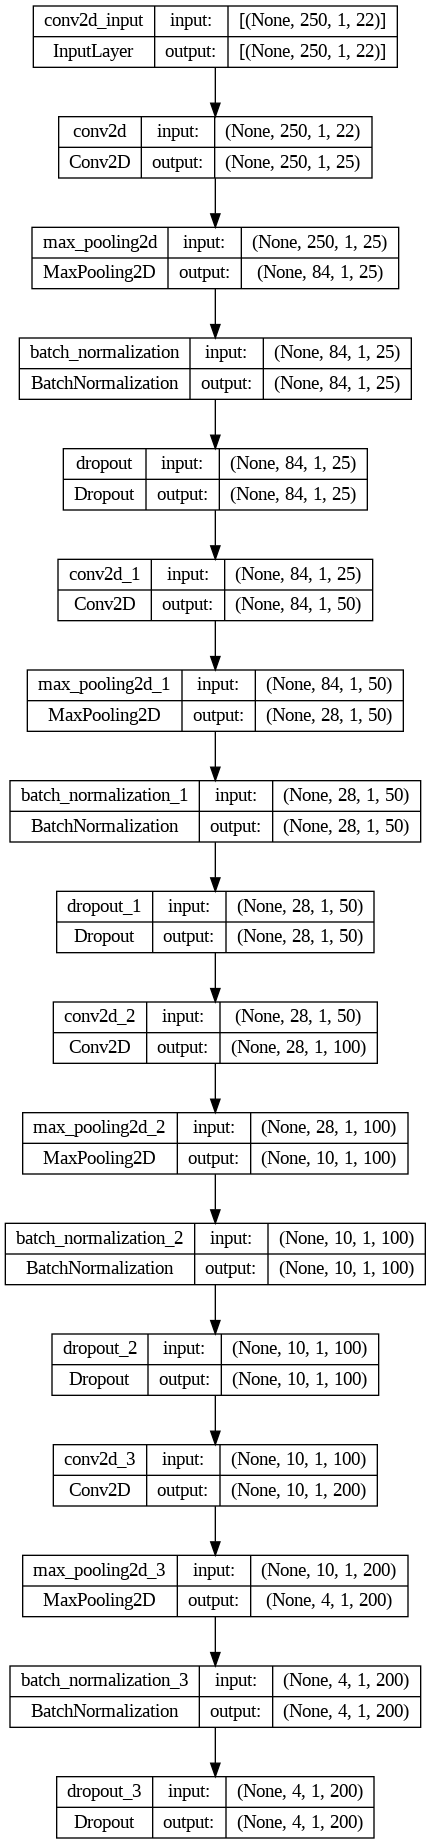

In [ ]:
plot_model(model_cnn.cnn_layers, to_file='CNN_layers.png', show_shapes=True)

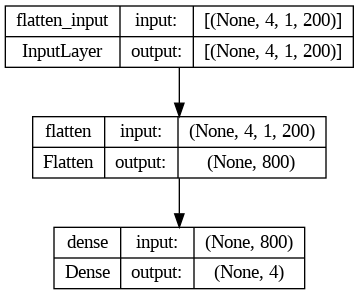

In [ ]:
plot_model(model_cnn.fc, to_file='CNN_fc.png', show_shapes=True)

### Question 1

Test the CNN only on subject 1's test data.

In [ ]:
print('x_test_s1:', x_test_s1.shape)
print('y_test_s1:', y_test_s1.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_test_s1: (200, 250, 1, 22)
y_test_s1: (200, 4)
x_test: (1772, 250, 1, 22)
y_test: (1772, 4)


In [ ]:
# Testing the model
s1_score = model_cnn.evaluate(x_test_s1, y_test_s1, verbose=0)
print('Test accuracy of the CNN model on subject 1\'s data:', s1_score[1])

Test accuracy of the CNN model on subject 1's data: 0.6549999713897705


## Recurrent Neural Networks (LSTM)

In [ ]:
model_lstm = RNN_LSTM()
model_lstm.compile(loss='categorical_crossentropy',
                 optimizer=optimizer,
                 metrics=['accuracy'])

In [ ]:
# Training and validating the model
LSTM_results = model_lstm.fit(x_train,
                         y_train,
                         batch_size=batch_size,
                         epochs=epochs,
                         validation_data=(x_valid, y_valid), verbose=True)

Epoch 1/100
109/109 [==============================] - 51s 448ms/step - loss: 1.4044 - accuracy: 0.2589 - val_loss: 1.3857 - val_accuracy: 0.2500
Epoch 2/100
109/109 [==============================] - 50s 459ms/step - loss: 1.3817 - accuracy: 0.2853 - val_loss: 1.3538 - val_accuracy: 0.3493
Epoch 3/100
109/109 [==============================] - 51s 466ms/step - loss: 1.3713 - accuracy: 0.3010 - val_loss: 1.3560 - val_accuracy: 0.3133
Epoch 4/100
109/109 [==============================] - 48s 440ms/step - loss: 1.3516 - accuracy: 0.3299 - val_loss: 1.3837 - val_accuracy: 0.2913
Epoch 5/100
109/109 [==============================] - 51s 462ms/step - loss: 1.3308 - accuracy: 0.3537 - val_loss: 1.3750 - val_accuracy: 0.2913
Epoch 6/100
109/109 [==============================] - 51s 468ms/step - loss: 1.3099 - accuracy: 0.3761 - val_loss: 1.3601 - val_accuracy: 0.3513
Epoch 7/100
109/109 [==============================] - 49s 450ms/step - loss: 1.2857 - accuracy: 0.3907 - val_loss: 1.3632 -

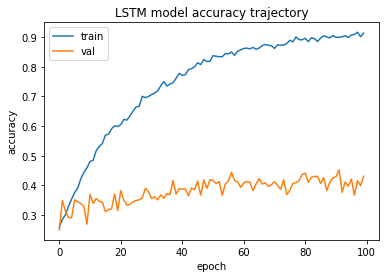

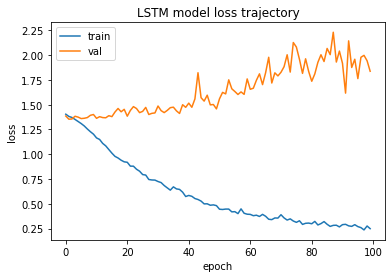

Test accuracy of the LSTM model: 0.3803611695766449


In [ ]:
print_model_results(model_lstm, 'LSTM', LSTM_results)

In [ ]:
print(model_lstm.summary())

Model: "rnn_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM_layers (Sequential)    (None, 4)                 617176    
                                                                 
Total params: 617,176
Trainable params: 617,176
Non-trainable params: 0
_________________________________________________________________
None


### Question 1

Test the LSTM only on subject 1's test data.

In [ ]:
# Testing the model
s1_score = model_lstm.evaluate(x_test_s1, y_test_s1, verbose=0)
print('Test accuracy of the LSTM model on subject 1\'s data:', s1_score[1])

Test accuracy of the LSTM model on subject 1's data: 0.3449999988079071


## Recurrent Neural Networks (GRU)

In [ ]:
model_gru = RNN_GRU()
model_gru.compile(loss='categorical_crossentropy',
                 optimizer=optimizer,
                 metrics=['accuracy'])

In [ ]:
# Training and validating the model
GRU_results = model_gru.fit(x_train,
                        y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_valid, y_valid), verbose=True)

Epoch 1/100
109/109 [==============================] - 50s 427ms/step - loss: 1.4374 - accuracy: 0.2681 - val_loss: 1.4231 - val_accuracy: 0.2713
Epoch 2/100
109/109 [==============================] - 44s 400ms/step - loss: 1.4068 - accuracy: 0.2559 - val_loss: 1.4363 - val_accuracy: 0.2380
Epoch 3/100
109/109 [==============================] - 45s 418ms/step - loss: 1.3954 - accuracy: 0.2621 - val_loss: 1.4079 - val_accuracy: 0.2687
Epoch 4/100
109/109 [==============================] - 44s 401ms/step - loss: 1.3938 - accuracy: 0.2694 - val_loss: 1.4248 - val_accuracy: 0.2827
Epoch 5/100
109/109 [==============================] - 43s 399ms/step - loss: 1.3897 - accuracy: 0.2741 - val_loss: 1.4043 - val_accuracy: 0.2507
Epoch 6/100
109/109 [==============================] - 43s 398ms/step - loss: 1.3898 - accuracy: 0.2764 - val_loss: 1.4184 - val_accuracy: 0.2567
Epoch 7/100
109/109 [==============================] - 46s 420ms/step - loss: 1.3820 - accuracy: 0.2818 - val_loss: 1.4140 -

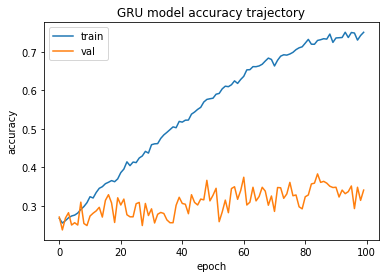

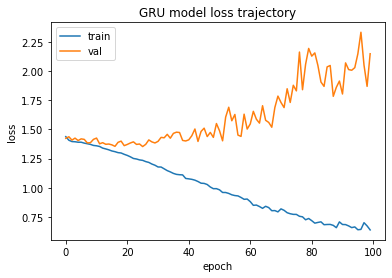

Test accuracy of the GRU model: 0.3566591441631317


In [ ]:
print_model_results(model_gru, 'GRU', GRU_results)

In [ ]:
print(model_gru.summary())

Model: "rnn_gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 GRU_layers (Sequential)     (None, 4)                 600920    
                                                                 
Total params: 600,920
Trainable params: 600,920
Non-trainable params: 0
_________________________________________________________________
None


### Question 1

Test the GRU only on subject 1's test data.

In [ ]:
# Testing the model
s1_score = model_gru.evaluate(x_test_s1, y_test_s1, verbose=0)
print('Test accuracy of the GRU model on subject 1\'s data:', s1_score[1])

Test accuracy of the GRU model on subject 1's data: 0.29499998688697815


## CNN - LSTM

In [ ]:
model_crnn = CNN_LSTM()
model_crnn.compile(loss='categorical_crossentropy',
                 optimizer=optimizer,
                 metrics=['accuracy'])

In [ ]:
# Training and validating the model
CNN_LSTM_results = model_crnn.fit(x_train,
                             y_train,
                             batch_size=batch_size,
                             epochs=epochs,
                             validation_data=(x_valid, y_valid), verbose=True)

Epoch 1/100
109/109 [==============================] - 51s 445ms/step - loss: 1.3664 - accuracy: 0.3059 - val_loss: 1.3265 - val_accuracy: 0.3693
Epoch 2/100
109/109 [==============================] - 48s 433ms/step - loss: 1.2894 - accuracy: 0.3932 - val_loss: 1.2713 - val_accuracy: 0.3667
Epoch 3/100
109/109 [==============================] - 49s 454ms/step - loss: 1.2221 - accuracy: 0.4404 - val_loss: 1.2159 - val_accuracy: 0.4227
Epoch 4/100
109/109 [==============================] - 47s 431ms/step - loss: 1.1946 - accuracy: 0.4546 - val_loss: 1.2292 - val_accuracy: 0.4220
Epoch 5/100
109/109 [==============================] - 49s 448ms/step - loss: 1.1695 - accuracy: 0.4678 - val_loss: 1.1832 - val_accuracy: 0.4673
Epoch 6/100
109/109 [==============================] - 47s 429ms/step - loss: 1.1347 - accuracy: 0.4934 - val_loss: 1.1638 - val_accuracy: 0.4680
Epoch 7/100
109/109 [==============================] - 47s 429ms/step - loss: 1.1217 - accuracy: 0.4960 - val_loss: 1.1628 -

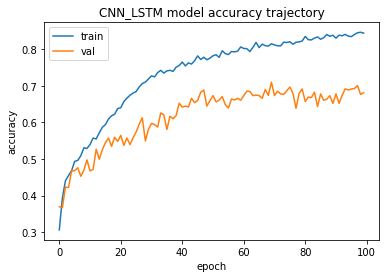

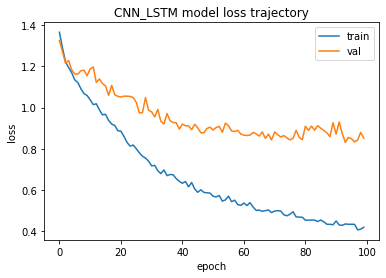

Test accuracy of the CNN_LSTM model: 0.6839728951454163


In [ ]:
print_model_results(model_crnn, 'CNN_LSTM', CNN_LSTM_results)

In [ ]:
print(model_crnn.crnn_layers.summary())

Model: "CNN-LSTM_layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 250, 1, 25)        5525      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 84, 1, 25)        0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 84, 1, 25)        100       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 84, 1, 25)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 84, 1, 50)         12550     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 28, 1, 50)    

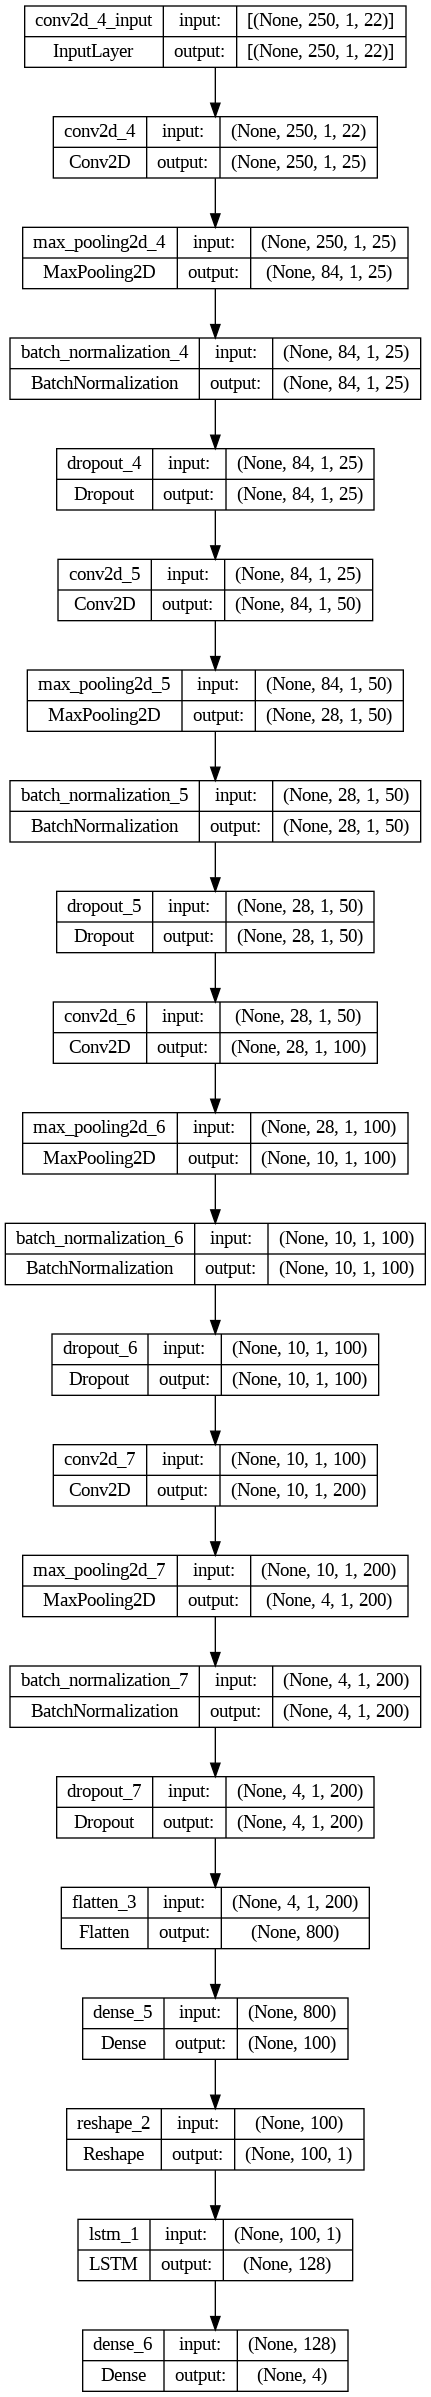

In [ ]:
plot_model(model_crnn.crnn_layers, to_file='CRNN_LSTM_layers.png', show_shapes=True)

### Question 1

Test the CNN-LSTM only on subject 1's test data.

In [ ]:
# Testing the model
s1_score = model_lstm.evaluate(x_test_s1, y_test_s1, verbose=0)
print('Test accuracy of the CNN-LSTM model on subject 1\'s data:', s1_score[1])

Test accuracy of the CNN-LSTM model on subject 1's data: 0.2800000011920929


## CNN - GRU

In [ ]:
model_cgru = CNN_GRU()
model_cgru.compile(loss='categorical_crossentropy',
                 optimizer=optimizer,
                 metrics=['accuracy'])

In [ ]:
# epochs=100
# I don't have sufficient time and GPU to show experiment with larger epochs again here. 
# Therefore, I set it equals to 30, which is quite small to reduce training time.
# Based on the graph we found before, it should converge to a constant when epochs = 40.
epochs=40

In [ ]:
# Training and validating the model
CNN_GRU_results = model_cgru.fit(x_train,
                            y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            validation_data=(x_valid, y_valid), verbose=True)

Epoch 1/40
109/109 [==============================] - 44s 408ms/step - loss: 0.7378 - accuracy: 0.7103 - val_loss: 0.9575 - val_accuracy: 0.6353
Epoch 2/40
109/109 [==============================] - 45s 409ms/step - loss: 0.7153 - accuracy: 0.7274 - val_loss: 0.9163 - val_accuracy: 0.6527
Epoch 3/40
109/109 [==============================] - 46s 421ms/step - loss: 0.7235 - accuracy: 0.7200 - val_loss: 0.9442 - val_accuracy: 0.6720
Epoch 4/40
109/109 [==============================] - 44s 408ms/step - loss: 0.7034 - accuracy: 0.7264 - val_loss: 0.9431 - val_accuracy: 0.6627
Epoch 5/40
109/109 [==============================] - 44s 404ms/step - loss: 0.7000 - accuracy: 0.7358 - val_loss: 0.9181 - val_accuracy: 0.6593
Epoch 6/40
109/109 [==============================] - 46s 424ms/step - loss: 0.6763 - accuracy: 0.7437 - val_loss: 0.9914 - val_accuracy: 0.6020
Epoch 7/40
109/109 [==============================] - 44s 405ms/step - loss: 0.6858 - accuracy: 0.7296 - val_loss: 0.9210 - val_ac

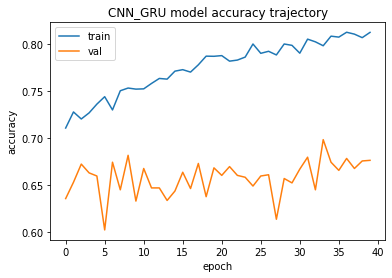

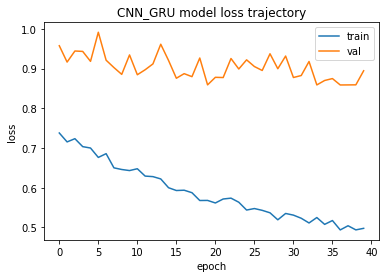

Test accuracy of the CNN_GRU model: 0.6557562351226807


In [ ]:
print_model_results(model_cgru, 'CNN_GRU', CNN_GRU_results)

In [ ]:
print(model_cgru.cgnn_layers.summary())

Model: "CNN-GRU_layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 1, 25)        5525      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 1, 25)        0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 84, 1, 25)        100       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 84, 1, 25)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 84, 1, 50)         12550     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 1, 50)     

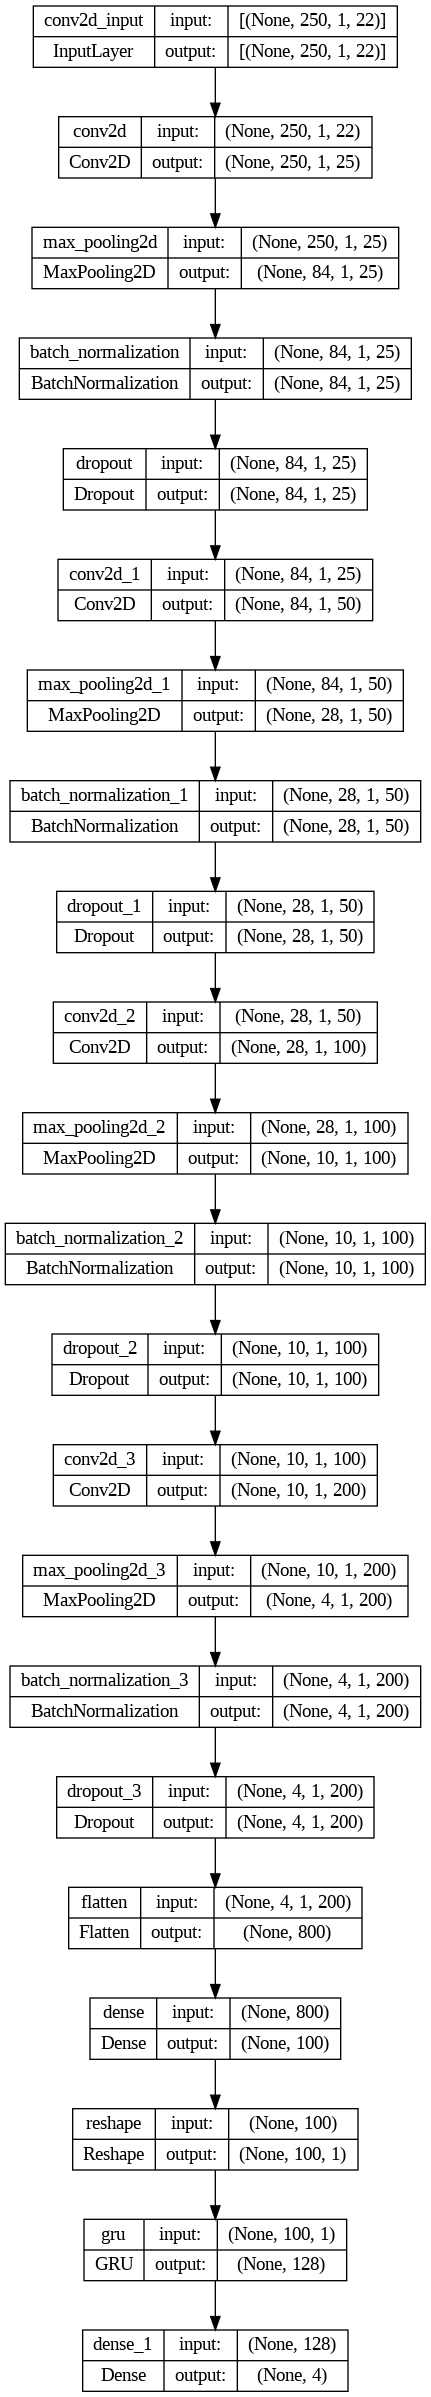

In [ ]:
plot_model(model_cgru.cgnn_layers, to_file='CRNN_GRU_layers.png', show_shapes=True)

### Question 1

Test the CNN-GRU only on subject 1's test data.

In [ ]:
# Testing the model
s1_score = model_cgru.evaluate(x_test_s1, y_test_s1, verbose=0)
print('Test accuracy of the CNN-LSTM model on subject 1\'s data:', s1_score[1])

Test accuracy of the CNN-LSTM model on subject 1's data: 0.5649999976158142


## Convolutional Variational Autoencoder (CVAE)

In [ ]:
X_train_valid, y_train_valid, X_test, y_test = load_data(data_path, subjects=subjects)
trials, features, timebins = X_train_valid.shape
input_shape =(features, timebins, 1)
batch_size = 64 
filters = 16
latent_dim = 2 
kernel_size = 8
epochs = 25
optimizer = Adam(lr=learning_rate)

In [ ]:
def sampling(args): 
    # Q(z|X)
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [ ]:
def plot_results(models,
                 data, 
                 batch_size=128,
                 model_name="CVAE"):

    encoder, decoder = models
    x_test, y_test = data
    print(x_test.shape)
    print(y_test.shape)
    os.makedirs(model_name, exist_ok=True)

    filename = os.path.join(model_name, "CVAE.png")
    z_mean, _, _ = encoder.predict(x_test,
                                   batch_size=batch_size)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.savefig(filename)
    plt.show()

    filename = os.path.join(model_name, "digits_over_latent.png")

    z_sample = np.array([[22,1000]])
    x_decoded = decoder.predict(z_sample)
    print(x_decoded.shape)
    fs = 250
    increments = np.linspace(0,1000,1000)
    
    plt.figure()

    for i in range(0, 22):
      y = np.row_stack((x_decoded[:,i,:,:]))

      #print(y)
      plt.plot(increments, (y), '.')
      plt.xlabel("Sample Index [n]")
      plt.ylabel("z[n]")
      plt.title("Single Trial, all EEG")

In [ ]:
# Reference:
# https://learnopencv.com/variational-autoencoder-in-tensorflow/
# https://www.tensorflow.org/tutorials/generative/cvae

inputs = Input(shape=input_shape, name='encoder_input')
# print(inputs)
x = inputs
filters *= 2

#Temporal conv
x = Conv2D(filters=filters,
          kernel_size=(1, 20),
          strides=(1,10),
          )(x)

x = LeakyReLU(alpha=0.3)(x)

filters *= 2
#Spatial Conv
x = Conv2D(filters=filters,
          kernel_size=(22, 1)
          )(x)
x = LeakyReLU(alpha=0.3)(x)

#shape info needed to build decoder model
shape = K.int_shape(x)

#latent vector Q(z|X)
x = Flatten()(x)
x = Dense(16, activation='relu')(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)
z_log_var = z_log_var + 1e-8 
# print("zlog ", z_log_var)

#reparameterization trick: instead of sampling from Q(z|X), sample epsilon = N(0,I)
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

#compile encoder
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

#decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(shape[1] * shape[2] * shape[3], activation='relu')(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)

#reverse: spatial conv
x = Conv2DTranspose(filters=filters,
              kernel_size=(22, 1),
              activation='relu',
              )(x)
#x = BatchNormalization(epsilon=1e-5)(x)

filters //= 2

#reverse: temporal conv
x = Conv2DTranspose(filters=filters,
          kernel_size=(1, 20),
          activation='relu',
          strides=(1, 10))(x)

filters //= 2

outputs = Conv2DTranspose(filters=1,
                          kernel_size=kernel_size,
                          padding='same',
                          name='decoder_output')(x)

#compile decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
# plot_model(decoder, to_file='CVAE_decoder.png', show_shapes=True)

#compile VAE model
outputs = decoder(encoder(inputs)[2])
CVAE = Model(inputs, outputs, name='CVAE')

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 22, 1000, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 22, 99, 32)   672         ['encoder_input[0][0]']          
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 22, 99, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 1, 99, 64)    45120       ['leaky_re_lu[0][0]']      

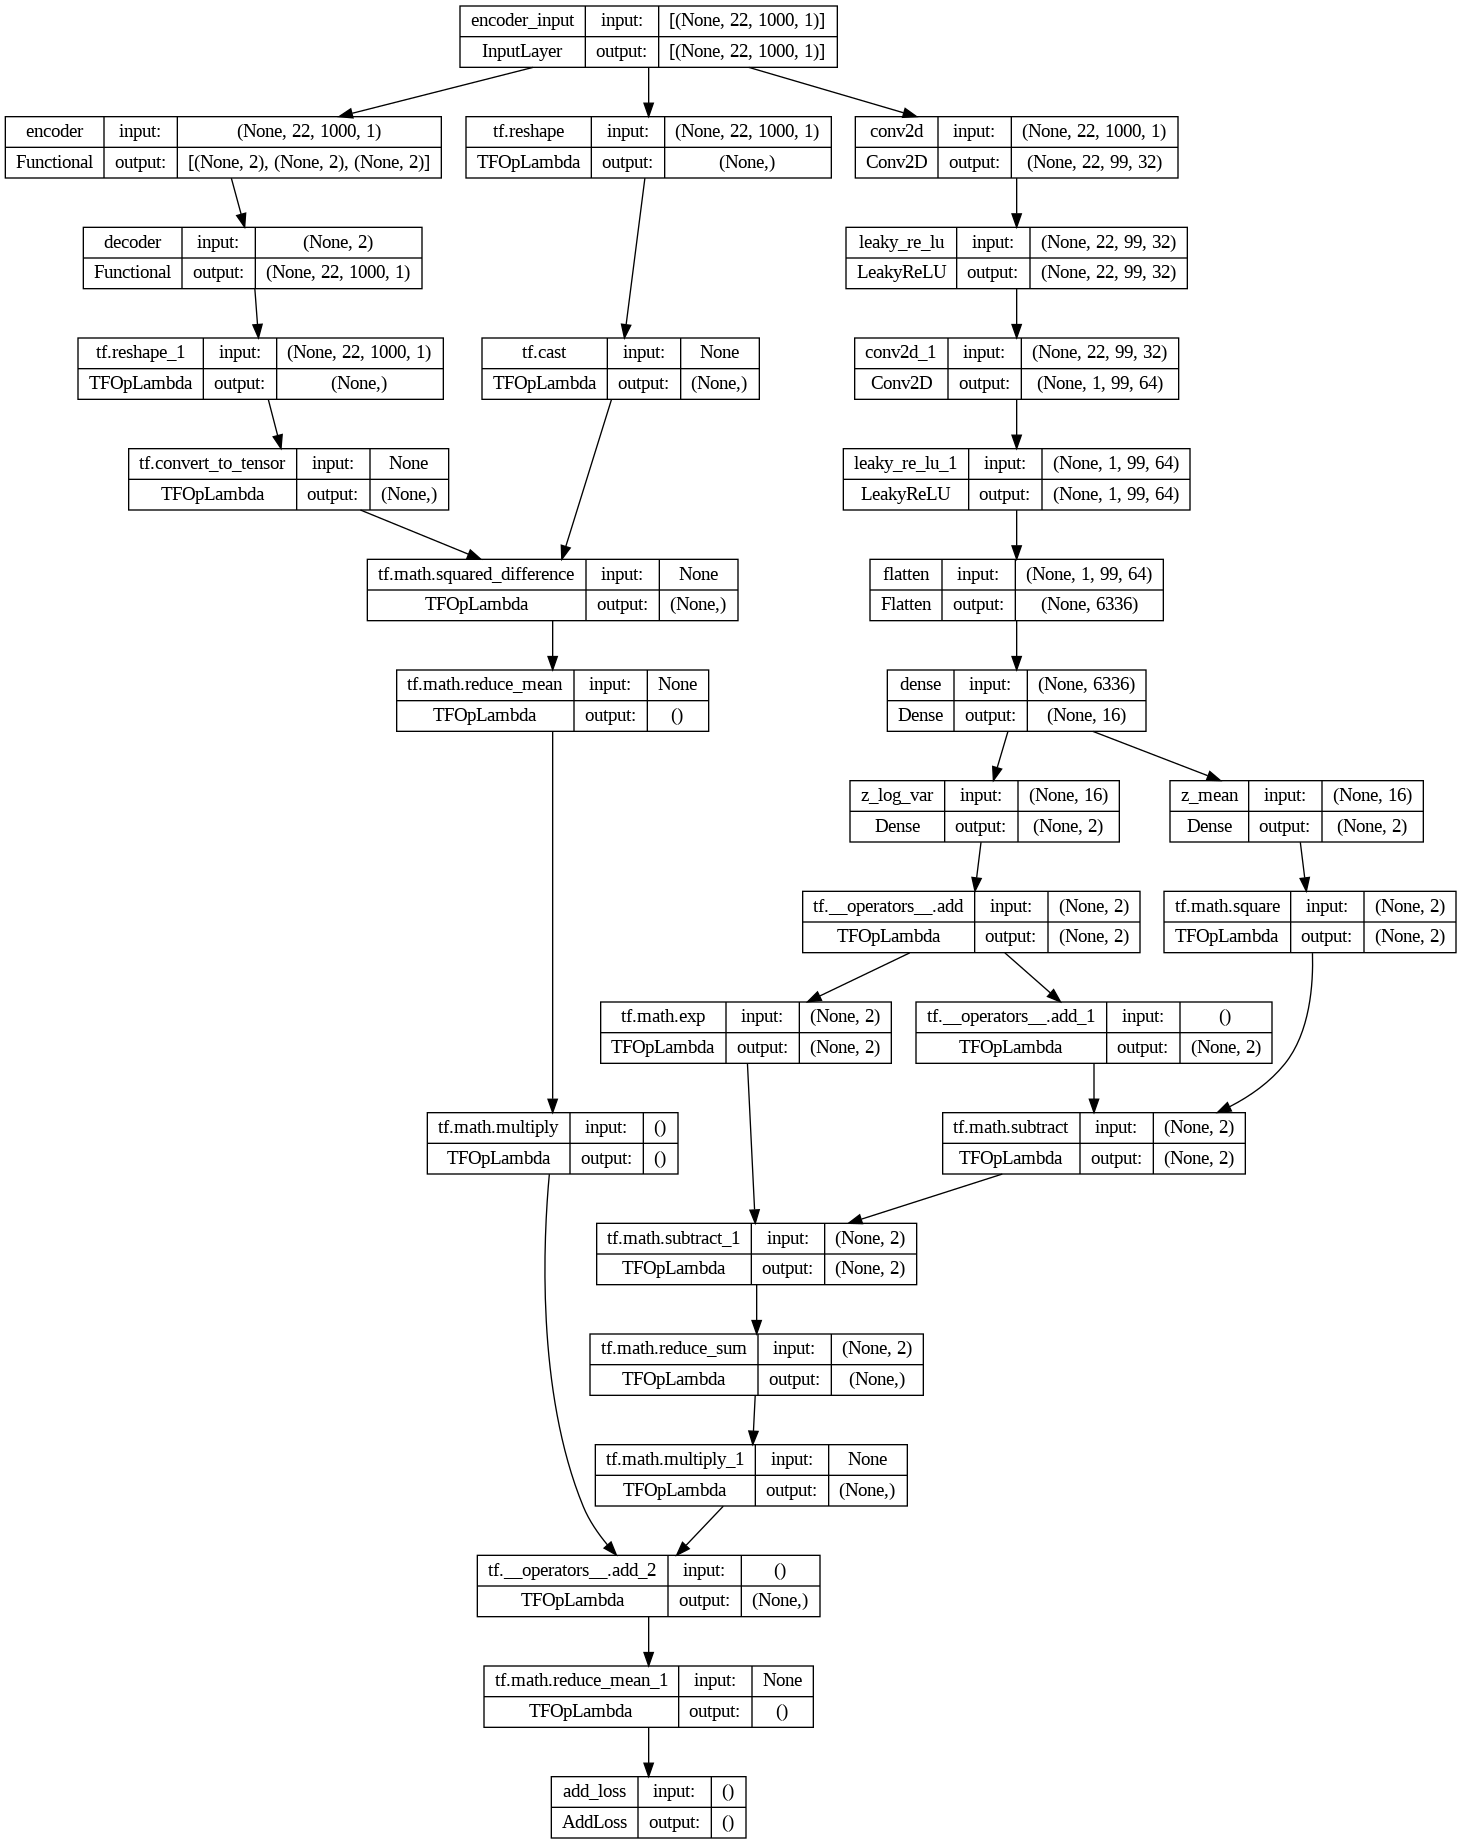

In [ ]:
models = (encoder, decoder)
data = (X_test, y_test)
reconstruction_loss = mse(K.flatten(inputs), K.flatten(outputs))
reconstruction_loss *= features * timebins
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
CVAE.add_loss(vae_loss)

CVAE.compile(optimizer=optimizer, loss=None)

# CVAE.summary()
plot_model(CVAE, to_file='CVAE_structure.png', show_shapes=True)

Epoch 1/25
34/34 [==============================] - 140s 4s/step - loss: 2502986.0000 - val_loss: 2507842.7500
Epoch 2/25
34/34 [==============================] - 152s 5s/step - loss: 2485622.7500 - val_loss: 2518399.5000
Epoch 3/25
34/34 [==============================] - 133s 4s/step - loss: 2489356.5000 - val_loss: 2468510.2500
Epoch 4/25
34/34 [==============================] - 130s 4s/step - loss: 2437868.0000 - val_loss: 2446625.7500
Epoch 5/25
34/34 [==============================] - 135s 4s/step - loss: 2419477.7500 - val_loss: 2441157.7500
Epoch 6/25
34/34 [==============================] - 132s 4s/step - loss: 2444034.5000 - val_loss: 2438487.2500
Epoch 7/25
34/34 [==============================] - 132s 4s/step - loss: 2433104.5000 - val_loss: 2436801.7500
Epoch 8/25
34/34 [==============================] - 132s 4s/step - loss: 2412448.5000 - val_loss: 2435122.2500
Epoch 9/25
34/34 [==============================] - 132s 4s/step - loss: 2408401.7500 - val_loss: 2434682.7500
E

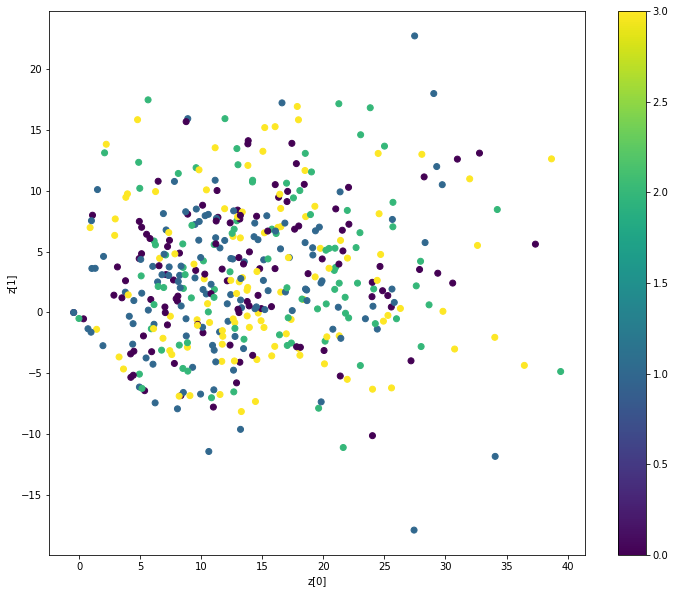

1/1 [==============================] - 0s 133ms/step
(1, 22, 1000, 1)


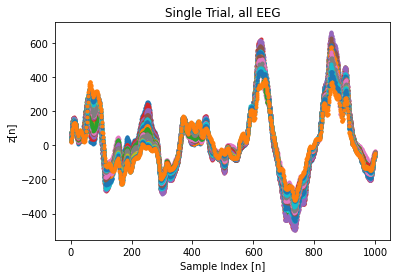

In [ ]:
history = CVAE.fit(x = X_train_valid,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, None))

plot_results(models, data, batch_size=batch_size, model_name="CVAE")

14/14 [==============================] - 10s 693ms/step


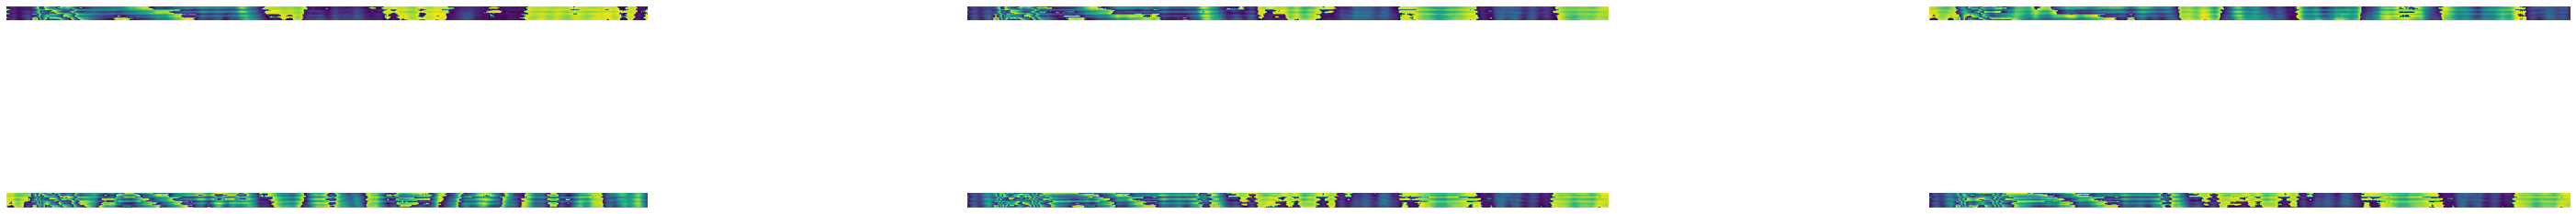

In [ ]:
reconstruct = CVAE.predict(X_test)
figsize = 50
 
fig = plt.figure(figsize=(figsize, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i in range(6):
    ax = fig.add_subplot(3, 3, i+1)
    ax.axis('off')
    pred = reconstruct[i, :, :, :] * 64
    pred = np.array(pred)  
    pred = pred.astype(np.uint8)
    ax.imshow(pred)

## Evaluate the classification accuracy as a function of time (Question 3)
 


In [ ]:
def data_prep_time(X, y, sub_sample, average, noise, timespot):
    """
    from the discussion 9 coding notebook
    """
    
    total_X = None
    total_y = None
    
    # Trimming the data (sample,22,1000) -> (sample,22,500)
    if timespot < 250:
      X = X[:, :, timespot : timespot + 500]
    elif timespot >= 250 and timespot <= 750:
      X = X[:, :, timespot - 250 : timespot + 250]
    elif timespot > 750:
      X = X[:, :, timespot - 500 : timespot]

    # X = X[:, :, 0:timespot]
    # print('Shape of X after trimming:',X.shape)
    
    # Maxpooling the data (sample,22,1000) -> (sample,22,500/sub_sample)
    X_max = np.max(X.reshape(X.shape[0], X.shape[1], -1, sub_sample), axis=3)
    
    total_X = X_max
    total_y = y
    # print('Shape of X after maxpooling:',total_X.shape)
    
    # Averaging + noise 
    X_average = np.mean(X.reshape(X.shape[0], X.shape[1], -1, average),axis=3)
    X_average = X_average + np.random.normal(0.0, 0.5, X_average.shape)
    
    total_X = np.vstack((total_X, X_average))
    total_y = np.hstack((total_y, y))
    # print('Shape of X after averaging+noise and concatenating:',total_X.shape)
    
    # Subsampling
    
    for i in range(sub_sample):
        
        X_subsample = X[:, :, i::sub_sample] + \
                            (np.random.normal(0.0, 0.5, X[:, :,i::sub_sample].shape) if noise else 0.0)
            
        total_X = np.vstack((total_X, X_subsample))
        total_y = np.hstack((total_y, y))

    return total_X, total_y

In [ ]:
def helper(X_train_valid, y_train_valid, X_test, y_test, timespot):
  ind_valid = np.random.choice(2115, 375, replace=False)
  ind_train = np.array(list(set(range(2115)).difference(set(ind_valid))))

  # Creating the training and validation sets using the generated indices
  (X_train, X_valid) = X_train_valid[ind_train], X_train_valid[ind_valid] 
  (y_train, y_valid) = y_train_valid[ind_train], y_train_valid[ind_valid]


  ## Preprocessing the dataset
  x_train, y_train = data_prep_time(X_train,y_train,2,2,True, timespot)
  x_valid, y_valid = data_prep_time(X_valid,y_valid,2,2,True, timespot)
  X_test_prep, y_test_prep = data_prep_time(X_test,y_test,2,2,True, timespot)

  # Converting the labels to categorical variables for multiclass classification
  y_train = to_categorical(y_train, 4)
  y_valid = to_categorical(y_valid, 4)
  y_test = to_categorical(y_test_prep, 4)

  # Adding width of the segment to be 1
  x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
  x_valid = x_valid.reshape(x_valid.shape[0], x_valid.shape[1], x_valid.shape[2], 1)
  x_test = X_test_prep.reshape(X_test_prep.shape[0], X_test_prep.shape[1], X_test_prep.shape[2], 1)


  # Reshaping the training and validation dataset
  x_train = np.swapaxes(x_train, 1,3)
  x_train = np.swapaxes(x_train, 1,2)
  x_valid = np.swapaxes(x_valid, 1,3)
  x_valid = np.swapaxes(x_valid, 1,2)
  x_test = np.swapaxes(x_test, 1,3)
  x_test = np.swapaxes(x_test, 1,2)
  return x_train, y_train, x_valid, y_valid, x_test, y_test 

In [ ]:
X_train_valid, y_train_valid, X_test, Y_test = load_data(data_path, subjects=subjects)
# check data shape
print('X_train_valid:', X_train_valid.shape)
print('y_train_valid:', y_train_valid.shape)
print('X_test:', X_test.shape)
print('y_test:', Y_test.shape)

X_train_valid: (2115, 22, 1000)
y_train_valid: (2115,)
X_test: (443, 22, 1000)
y_test: (443,)


In [ ]:
test_accs = []
for t in range(100, 1001, 200):
  print('current', t, '..')
  x_train, y_train, x_valid, y_valid, x_test, y_test = helper(X_train_valid, y_train_valid, X_test, Y_test, t)
  m = CNN()
  m.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
  mr = m.fit(x_train,
              y_train,
              batch_size=batch_size,
              epochs=30,
              validation_data=(x_valid, y_valid), verbose=False)
  model_score = m.evaluate(x_test, y_test, verbose=0)
  test_accs.append(model_score)

current 100 ..
current 300 ..
current 500 ..
current 700 ..
current 900 ..


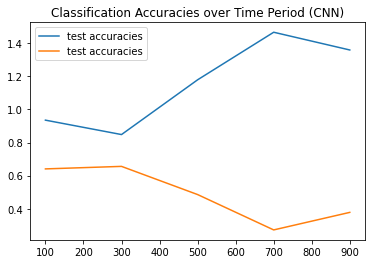

In [ ]:
# plot
plt.plot(range(100, 1001, 200), test_accs, label='test accuracies')
plt.legend(loc='best')
plt.xlabel('')
plt.title("Classification Accuracies over Time Period (CNN)")
plt.savefig('q3', format='png')
plt.show()

In [ ]:
test_accs = []
for t in range(100, 1001, 200):
  print('current', t, '..')
  x_train, y_train, x_valid, y_valid, x_test, y_test = helper(X_train_valid, y_train_valid, X_test, Y_test, t)
  m = CNN()
  m.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
  mr = m.fit(x_train,
              y_train,
              batch_size=batch_size,
              epochs=30,
              validation_data=(x_valid, y_valid), verbose=False)
  model_score = m.evaluate(x_test, y_test, verbose=0)
  test_accs.append(model_score)

current 100 ..
current 300 ..
current 500 ..
current 700 ..
current 900 ..


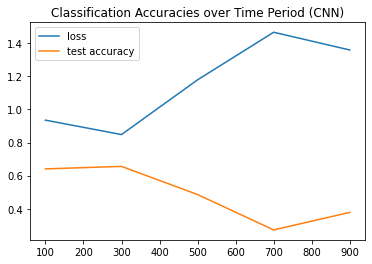

In [ ]:
llist = []
alist = []
for loss, acc in test_accs:
  llist.append(loss)
  alist.append(acc)

# plot
plt.plot(range(100, 1001, 200), llist, label='loss')
plt.plot(range(100, 1001, 200), alist, label='test accuracy')
plt.legend(loc='best')
plt.xlabel('')
plt.title("Classification Accuracies over Time Period (CNN)")
plt.savefig('q3', format='png')
plt.show()